In [23]:
#Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [26]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [28]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
# Find the most recent date in the data set.
RecentDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
RecentDate

('2017-08-23',)

In [32]:
# Calculate the date one year from the last date in data set.
LastYear = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
#LastYear

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
PrecipData = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= LastYear).\
    order_by(Measurement.date).all()

# Perform a query to retrieve the data and precipitation scores
Scores = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
PrecipData_df = pd.DataFrame(PrecipData, columns=["Date","Precipitation"])

# Sort the dataframe by date
PrecipData_df.set_index("Date", inplace=True,)
PrecipData_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


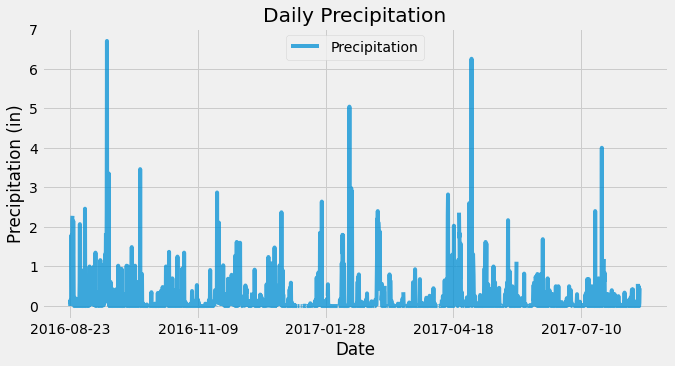

In [44]:
# Use Pandas Plotting with Matplotlib to plot the data
PrecipData_df.plot(alpha=0.75, figsize=(10,5))
plt.title('Daily Precipitation')
plt.legend(loc='upper center')
plt.ylabel('Precipitation (in)')
plt.savefig("Images/precipitation.png")
plt.show()

In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
PrecipData_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number stations in the dataset
StationCount = session.query(Measurement.station).distinct().count()
StationCount

9

In [36]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
ActiveStations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
ActiveStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Tobs = [func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)]

MostActive = session.query(*Tobs).\
    filter(Measurement.station == "USC00519281").all()
MostActive

[(54.0, 85.0, 71.66378066378067)]

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
TobsData = session.query(Measurement.tobs).\
    filter(Measurement.date >= LastYear).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()

In [39]:
# Save the results in a dataframe
TobsData_df = pd.DataFrame(TobsData, columns=["TOBS"])

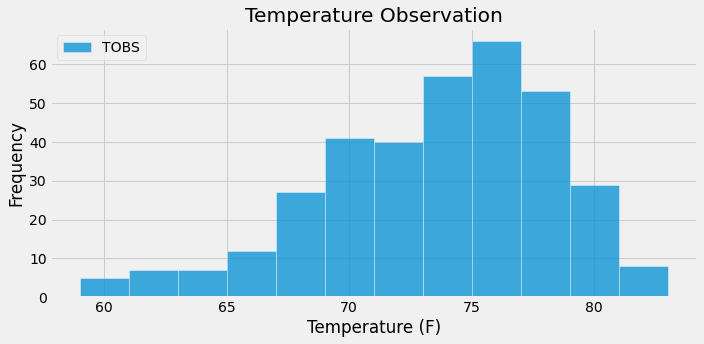

In [43]:
# Plot the results as a histogram
TobsData_df.plot.hist(bins=12, alpha=0.75, edgecolor='white', figsize=(10,5))
plt.title("Temperature Observation")
plt.xlabel("Temperature (F)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("Images/temperature.png")
plt.show()

# Close session

In [45]:
# Close Session
session.close()